     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

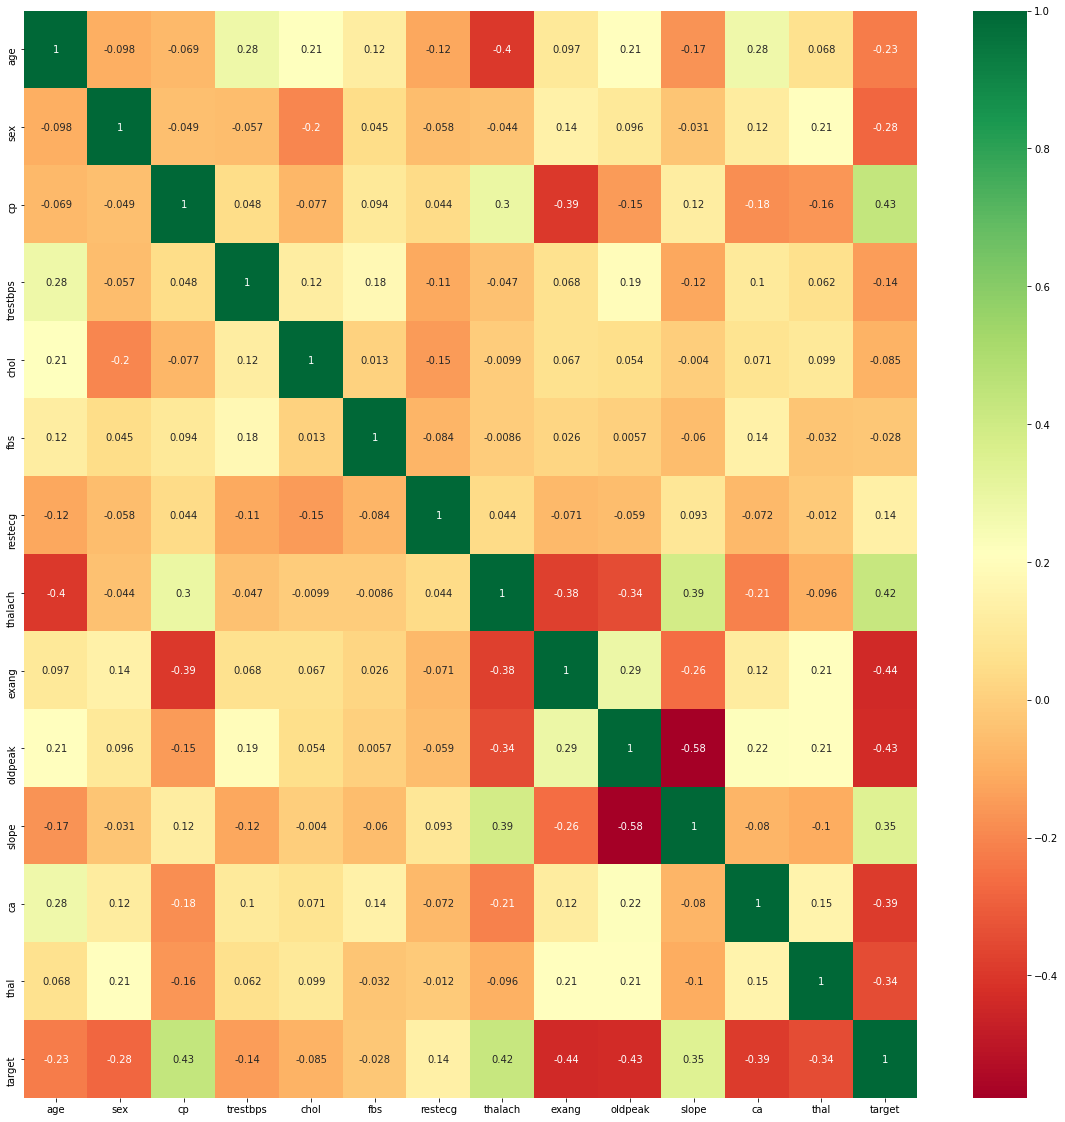

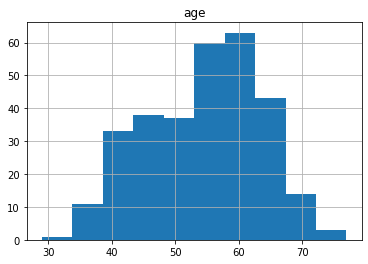

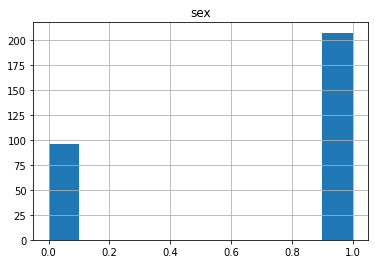

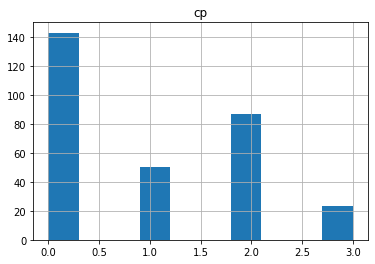

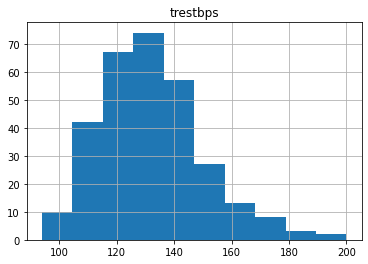

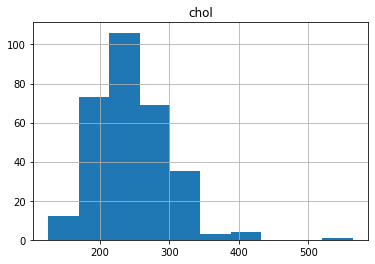

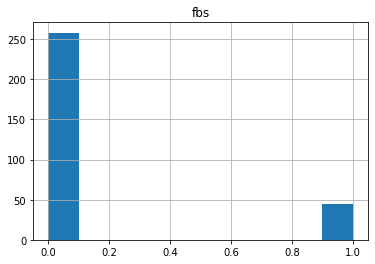

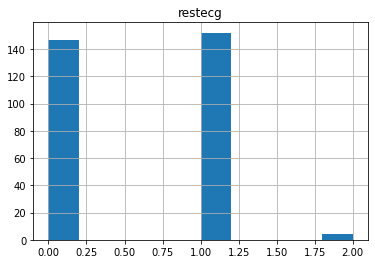

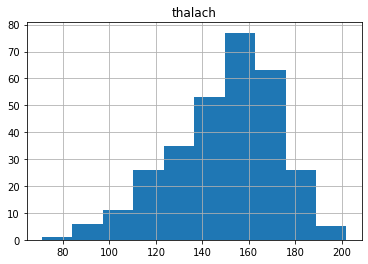

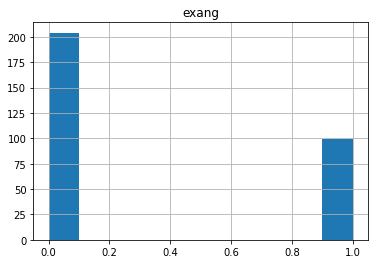

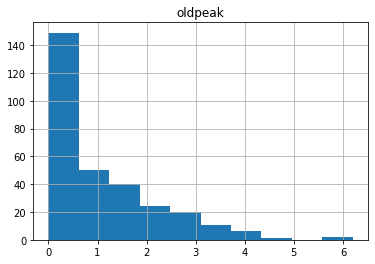

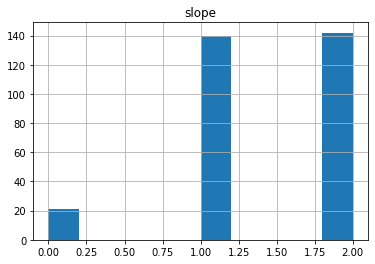

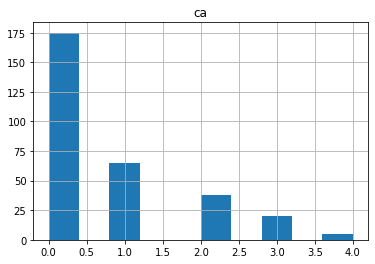

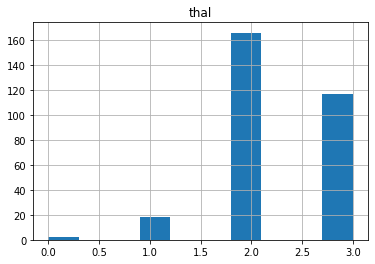

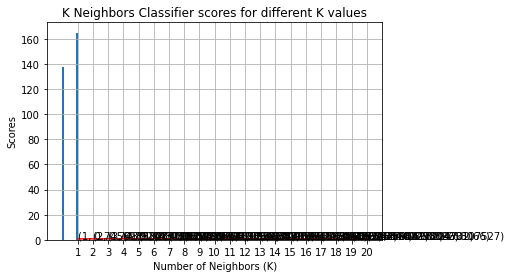

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/heart.csv")
print(data)
data.head()
data.info()
data.describe()
data.isnull().sum()

plt.show()
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Histogram for all Columns
data.hist(data.columns[0])
data.hist(data.columns[1])
data.hist(data.columns[2])
data.hist(data.columns[3])
data.hist(data.columns[4])
data.hist(data.columns[5])
data.hist(data.columns[6])
data.hist(data.columns[7])
data.hist(data.columns[8])
data.hist(data.columns[9])
data.hist(data.columns[10])
data.hist(data.columns[11])
data.hist(data.columns[12])
data.hist(data.columns[13])

print(data["age"])

from sklearn.preprocessing import StandardScaler
scaler_model = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = scaler_model.fit_transform(data[columns_to_scale])


X = data.drop(['target'], axis = 1)
y = data['target']


"""                  KNEAREST NEIGBOUR          """

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
#Finding the k value that gives higher accuracy
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
    
#Visualize to find K with higher value

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
    plt.xticks([i for i in range(1, 21)])
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Scores')
    plt.title('K Neighbors Classifier scores for different K values')

# k = 12 gives higher accuracy

knn_model = KNeighborsClassifier(n_neighbors = 18)
score = cross_val_score(knn_classifier,X,y,cv=10)

print("KNearest Neighbour Score : ",score.mean())


"""                  RANDOM FOREST CLASSIFIER            """

from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators=10)
score = cross_val_score(randomforest_model,X,y,cv=10)

print("Random Forest Score : ",score.mean())



    
"""                  DECISION TREE CLASSIFIER            """

from sklearn.tree import DecisionTreeClassifier
Decision_tree_model = DecisionTreeClassifier()
score = cross_val_score(Decision_tree_model, X , y, cv = 10)

print("Decision Tree Score : " ,score.mean())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)


final_model = KNeighborsClassifier()
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)
print(y_pred)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
print(cf)

#Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac*100,"%")